In [6]:
import sklearn.datasets as datasets
iris = datasets.load_iris()


In [78]:
print(digits.target)

[0 1 2 ..., 8 9 8]


In [8]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [9]:
digits = datasets.load_digits()

In [10]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [11]:
digits.data.shape

(1797, 64)

In [12]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [14]:
digits.data[0]　
# This is actually a 8 x 8 matrix which represent a drawing of a digit

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [16]:
digits.target[0]
# So target[0] actually represent the digit zero

0

In [17]:
print(digits.data[0].reshape(8, 8))

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [18]:
print(digits.data[100].reshape(8,8))

[[  0.   0.   0.   2.  13.   0.   0.   0.]
 [  0.   0.   0.   8.  15.   0.   0.   0.]
 [  0.   0.   5.  16.   5.   2.   0.   0.]
 [  0.   0.  15.  12.   1.  16.   4.   0.]
 [  0.   4.  16.   2.   9.  16.   8.   0.]
 [  0.   0.  10.  14.  16.  16.   4.   0.]
 [  0.   0.   0.   0.  13.   8.   0.   0.]
 [  0.   0.   0.   0.  13.   6.   0.   0.]]


In [19]:
print(digits.target[100])

4


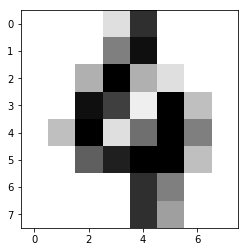

In [28]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[100], cmap = 'gray_r')
plt.show()

In [31]:
import numpy as np
def nearestDistance(x, data, target):
    return target[np.argmin(np.sum((x- data)**2, axis=1))]

target is  4
prediction is  4


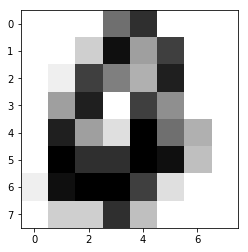

In [35]:
whichInstance = 756
plt.imshow(digits.images[whichInstance], cmap = 'gray_r')
print("target is ", digits.target[whichInstance])
prediction = nearestDistance(digits.images[whichInstance].reshape(64), digits.data, digits.target)
print("prediction is ", prediction)
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
X = digits.data
y = digits.target
neigh.fit(X, y)
print(neigh.predict([digits.images[756].reshape(64)]))
# predict_proba means predict probability, also means confidence
print(neigh.predict_proba([digits.images[756].reshape(64)]))

# [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# The array above means, this picture is 100% matching target[4], which is digit 4

[4]
[[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


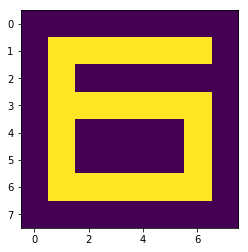

[0]
[[ 0.66666667  0.          0.          0.          0.          0.          0.
   0.          0.          0.33333333]]


In [77]:

def generateMatrix(input):
    myPicture = []
    for char in input.strip():
        if char == '\n':
            continue
        myPicture.append(15 if char == 'x' else 0);
    return np.array(myPicture).reshape(8,8)
plt.imshow(generateMatrix(input))
plt.show()
input = """
........
.xxxxxx.
.x......
.xxxxxx.
.x....x.
.x....x.
.xxxxxx.
........
"""
print(neigh.predict([myPicture.reshape(64)]))
print(neigh.predict_proba([myPicture.reshape(64)]))
# The result means this picture is 66.67% close to target[0] which is digit ZER0,
# and 33% close to target[9] which is digit NINE


In [163]:
def train_classifier(pivot):
    training_data = digits.data[:pivot]
    training_target = digits.target[:pivot]
    testing_data = digits.data[pivot:]
    testing_target = digits.target[pivot:]

    myClassifier = KNeighborsClassifier(n_neighbors=3).fit(training_data, training_target)
    predicted_target = myClassifier.predict(testing_data)
    diff = np.abs(testing_target - predicted_target)
    miss_count = len([x for x in diff if x != 0])
    accuracy = (len(predicted_target) - miss_count) / len(predicted_target)
    return accuracy, predicted_target

In [167]:
accuracy, predicted_target = train_classifier(1000)
accuracy

0.9648682559598495

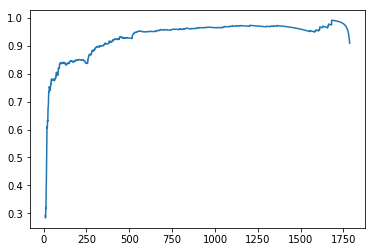

In [169]:
X = range(len(digits.data))[10:-10]
y = []
for i in X:
    accuracy, predicted = train_classifier(i)
    y.append(accuracy)
    
plt.plot(X, y)
plt.show()

In [154]:
np.argmax(y)
print("The prediction is best when the pivot is ", np.array(X)[np.argmax(y)])
print("Where the accuracy is ", np.max(y))

The prediction is best when the pivot is  1681
Where the accuracy is  0.991379310345


In [162]:
train_classifier(1000)

0.9648682559598495

In [179]:
from sklearn.metrics import confusion_matrix
accuracy, predicted_target = train_classifier(1000)
# What is confusion matrix ? 
# Check out here
# www.quora.con/Classification-machine-learning-What-is-confusion-matrix
cm = confusion_matrix(testing_target, predicted_target)
print(cm)



[[78  0  0  0  1  0  0  0  0  0]
 [ 0 79  0  0  0  0  0  0  1  0]
 [ 1  0 73  3  0  0  0  0  0  0]
 [ 0  0  1 73  0  1  0  2  2  0]
 [ 0  0  0  0 78  0  0  1  0  4]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  2  1  0  0  0  0  0 73  0]
 [ 0  0  0  3  0  3  0  0  1 74]]
